#数据集下载点：
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digit


In [3]:
import string
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg, misc

def load_data_preprocess(file_names):
    digit3_list = list()
    digit = np.zeros((8,8))

    for file_name in file_names:
        file_object = open(file_name)
        line = file_object.readline()
        while line:
            elements_oneLine_str = line.rstrip().split(',')
            len_elements_oneLine = len(elements_oneLine_str)    #经过测试，每行有65个元素，其中前64个位字符的数据，最后一个元素为该字符的label
            if elements_oneLine_str[64]=='3':
                for i in range(len_elements_oneLine-1):
                    index_row = i // 8
                    index_col = i % 8
                    digit[index_row][index_col] = int(elements_oneLine_str[i]) / 16
                digit3_list.append(np.array(digit))
            
            line = file_object.readline()

        file_object.close()
    print(str(len(digit3_list))+'张字符3的图片已经载入。')
    
    return digit3_list

#构建原始的样本特征矩阵
def build_featureMatrix_original(digit3_list):
    num_digit3 = len(digit3_list)
    num_dimension = (digit3_list[0].shape[0])*(digit3_list[0].shape[1])
    Y = np.zeros((num_digit3, num_dimension))    #Y是[n,d]的数组
    for i in range(num_digit3):
        Y[i, :] = digit3_list[i].flatten()
    #中心化
    mean_Y = Y.mean(axis=0)
    Y = Y - mean_Y
    
    return Y

def pca(X, dim_reduction, pattern):
    num_data, dim = X.shape
    
    #数据中心化(使数据围绕原点)
    mean_X = X.mean(axis=0)
    X = X - mean_X
    
    if pattern=='eigen':
        
        #方法1：计算协方差矩阵的特征值和特征向量
        #计算X的协方差矩阵
        M = np.dot(X, X.T)    #在python中数组的转置有三种方法，一种就是T；一种是transpose函数；还有一种是reshape函数
        
        #计算M的特征值和特征向量
        e, EV = linalg.eigh(M)
        
        #计算投影矩阵
        V = (np.dot(X.T, EV).T)[::-1]
        S = np.sqrt(e)[::-1]
        for i in range(V.shape[1]):
            V[:,i] /= S    #每一列都对应一个特征值
            
        return V[:dim_reduction]
    else:
        #方法2：svd分解
        U, S, V = np.linalg.svd(X)
        V = V[:dim_reduction]
        return V

#计算多项式参数
def computeWeights(V, Y):    #要求V的维数是[d, p]；要求Y的维数是[d, n]。其中d是每张图片的原始特征维数，
 #p是每张图片的降维后的特征维数，n是图片的数量
    #根据推导的公式进行计算
    item1 = np.linalg.inv((np.dot(V.T, V)))
    item2 = np.dot(V.T, Y)
    return np.dot(item1, item2)


#找到距离指定点集最近的图片集（图片和点一一对应）
def findShorestCollection(W, x_axis, y_axis):
    len_x_axis = len(x_axis)
    len_y_axis = len(y_axis)
    specialDigit3_index = np.zeros((len_x_axis,len_y_axis),np.int32)
    for i in range(len_x_axis):
        for j in range(len_y_axis):
            shortest_distance = 100
            specialDigit3_index[i][j] = 0
            for k in range(W.shape[1]):
                x_distance = W[0][k] - x_axis[i]
                y_distance = W[1][k] - y_axis[j]
                cur_distance = math.sqrt(x_distance*x_distance+y_distance*y_distance)
                if cur_distance<shortest_distance:
                    shortest_distance = cur_distance
                    specialDigit3_index[i][j] = k
    
    return specialDigit3_index
    
    
#将components以图片的方式保存下来（降成几维，就有几个components）
def saveComponents(V):
    num_components = V.shape[0]
    for i in range(num_components):
        component = V[i].reshape(8,8)
        component = misc.imresize(component, [32,32], interp='cubic')
        misc.imsave('results/component_' + str(i+1) + '.jpg', component)
        print('component_' + str(i+1) + '.jpg已被保存至results文件夹中。')
        
def drawPlot_scatter(W, specialDigit3_index):
    x_values_landmark = np.zeros(25)
    y_values_landmark = np.zeros(25)
    for i in range(25):
        index_row = i // 5
        index_col = i % 5
        index_digit3 = specialDigit3_index[index_row][index_col]
        x_values_landmark[i] = W[0][index_digit3]
        y_values_landmark[i] = W[1][index_digit3]
    
    x_values = W[0]
    y_values = W[1]
    
    plt.figure()
    plt.scatter(x_values, y_values, color='b', edgecolor='none', s=10)
    plt.scatter(x_values_landmark, y_values_landmark, c='', edgecolors='r', linewidths=2)    #绘制散点图（散点是空心的）
    plt.grid(True, linestyle='--')
    plt.xlabel('First Principle Component', fontsize=10)
    plt.ylabel('Second Principle Component', fontsize=10)
    plt.show()

572张字符3的图片已经载入。
component_1.jpg已被保存至results文件夹中。
component_2.jpg已被保存至results文件夹中。
图片digit3_with_red_scatter.jpg已被保存至results文件夹中。


C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt
C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:108: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
C:\Users\liuliyian\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``

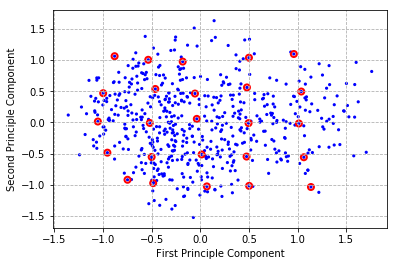

In [5]:
##########主程序入口：
#（1）载入数据（专门载入已经经过预处理的数据集）
file_names = ['data_set/optdigits_train.txt', 'data_set/optdigits_test.txt']
digit3_list = load_data_preprocess(file_names)

#（2）构造原始的特征矩阵
Y = build_featureMatrix_original(digit3_list)

#（3）数据特征降维
V = pca(Y, 2, 'eigen')

#（4）将components以图片的方式保存下来
saveComponents(V)

#（5）所有字符3在“Rank-2 Components”上的投影
W = computeWeights(V.T, Y.T)

#（6）找到离“横竖线交点”最近的点
x_axis = [-1,-0.5,0,0.5,1]
y_axis = [1,0.5,0,-0.5,-1]
specialDigit3_index = findShorestCollection(W, x_axis, y_axis)

#（7）可视化图片数据(离“横竖线交点”最近的点 对应的图片)
special_digits = np.zeros((160,160))
for j in range(25):
    index_row = j // 5
    index_col = j % 5
    index_digit3 = specialDigit3_index[index_row][index_col]
    special_digits[index_row*32:index_row*32+32, index_col*32:index_col*32+32] = misc.imresize(digit3_list[index_digit3], [32,32], interp='cubic')
    #注意：切片的时[a:b, c:d]表示取a到b-1行，c到d-1列。
misc.imsave('results/digit3_with_red_scatter.jpg', special_digits)
print('图片digit3_with_red_scatter.jpg已被保存至results文件夹中。')

#（8）可视化散点图
drawPlot_scatter(W, specialDigit3_index)

In [6]:
file_names = ['data_set/optdigits_train.txt'] # , 'data_set/optdigits_test.txt'
digit3_list = list()
digit = np.zeros((8,8))
for file_name in file_names:
    with open(file_name) as f:
        for line in f:
            #print("line:\n", line)
            elements_oneLine_str = line.rstrip().split(',')
            #print("elements_oneLine_str:\n", elements_oneLine_str)
            len_elements_oneLine = len(elements_oneLine_str) 
            #print("len_elements_oneLine:\n", len_elements_oneLine)
            if elements_oneLine_str[64] == '3':
                for i in range(len_elements_oneLine-1):
                    index_row = i // 8
                    index_col = i % 8
                    #print(index_row, index_col)
                    digit[index_row][index_col] = int(elements_oneLine_str[i]) / 16
                    
                digit3_list.append(np.array(digit))               
#print(len(digit3_list))

num_digit3 = len(digit3_list)
num_dimension = (digit3_list[0].shape[0])*(digit3_list[0].shape[1])
Y = np.zeros((num_digit3, num_dimension))    #Y是[n,d]的数组

for i in range(num_digit3):
    Y[i, :] = digit3_list[i].flatten()
    #中心化
mean_Y = Y.mean(axis=0)
Y = Y - mean_Y
mean_X = Y.mean(axis=0)
X = Y - mean_X
M = np.dot(X, X.T)    #在python中数组的转置有三种方法，一种就是T；一种是transpose函数；还有一种是reshape函数
print(X.shape)       
#计算M的特征值和特征向量
U, S, V = np.linalg.svd(X)
print(U.shape,S.shape, V.shape)
V = V[:2]
print(V.shape)


(389, 64)
(389, 389) (64,) (64, 64)
(2, 64)


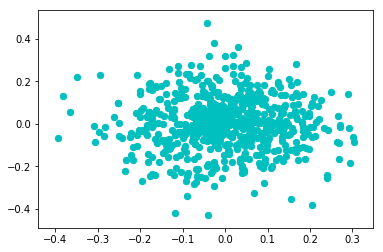

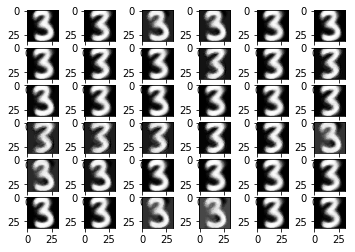

In [8]:
import numpy as np
from pylab import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def PCA(data):

    means = np.mean(data,axis=0)
    decentralized = data - means
    covmatrix = np.cov(decentralized, rowvar=0)
    D,V = np.linalg.eig(np.mat(covmatrix))#compute matrix feature vector
    D_tmp = np.argsort(D)
    MaxV = V[:,D_tmp[0:2]]
    Pdata = decentralized * MaxV
    return Pdata
 

def Show(feature):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    x = np.array(feature[:,0])
    y = np.array(feature[:,1])
    ax.scatter(x,y,marker='o',s = 40,c='c')
    plt.savefig("PCA.png")
    plt.show()


def imshow(data):

    u,s,v = np.linalg.svd(data,full_matrices=True)
    x = v[0,:]
    y = v[1,:]

    S = np.zeros((u.shape[0],v.shape[0]))
    S[0,0] = s[0]
    S[1,1] = s[1]

    pcadata = (u.dot(S)).dot(v)
    colum = 6
    for i in range(1,37):
        pcasample = pcadata[:,i]
        pcasample = pcasample.reshape((32,32))
        plt.subplot(6,6,i)
        imgplot = plt.imshow(pcasample,cmap=plt.cm.Greys_r)
    plt.savefig("reproduce_3.png")
    plt.show()

def readdata():
    # Load data
    Data = []
    Data_tmp = []
    with open('optdigits-orig.wdep',"r") as f:
        for line in f:
            if not line:
                break
            line = line.replace("\n","")
            if len(line) < 5:
                number = int(line)
                if number == 3:
                    Data.append(Data_tmp)
                Data_tmp=[]
            else:
                for str in line:
                    Data_tmp.append(int(str))

    Data_three = array(matrix(Data).T)

    return Data_three

if __name__ == '__main__':
    data = readdata()
    feature = PCA(data)
    Show(feature)
    imshow(data)

In [37]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1,-3], [-2, -1,-2], [-3, -2,-4], [1, 1,2], [2, 1,2], [3, 2,1]])

XMean = np.mean(X, axis = 0)
Y = X  - XMean
YCov = np.cov(Y)
print(Y.shape)
eigValue, eigVector = np.linalg.eig(np.mat(YCov))
eigValueI = np.argsort(eigValue)
eigVectorMax = eigVector[:, eigValueI[:2]]
Pdata = np.dot(Y,eigVectorMax.T)
print(Pdata)
pca = PCA(n_components=2)
pca.fit(X)

print(pca.explained_variance_ratio_)  

print(pca.singular_values_)  

(6, 3)


ValueError: shapes (6,3) and (5,6) not aligned: 3 (dim 1) != 5 (dim 0)